In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
#from __future__ import print_function
from sklearn.cluster import KMeans
kmeans = KMeans()
from PlottingFunctions import plot_inertia, plot_silhouette

In [2]:
ls -a

./
../
.DS_Store
.RData
.Rhistory
.ipynb_checkpoints/
PlottingFunctions.py
Untitled.ipynb
Untitled1.ipynb
__pycache__/
backup_pythonrtranslate.R
clean_quality_inr.csv
kmeans_users.ipynb
new_rf_order_quality_df.csv
order_train.csv
prelimEDA.ipynb
product_df.csv
python_to_R_translate.R
quality_df.csv
quality_featureimportance_randomforest_pre_cleaning.R
randomforest_featureimportance_qualityorder.ipynb
randomforest_featureimportance_userorder.ipynb
rf_order_quality_df.csv
user_df.csv
user_featureimportance_randomforest.R
users_and_orders.csv
users_and_orders2.csv
wishlist.R


In [25]:
# reading in the data

qu_df = pd.read_csv("new_rf_order_quality_df.csv")
print('size of qu_df:', qu_df.shape)

size of qu_df: (277759, 36)


In [4]:
qu_df.columns

Index(['application_type', 'op_type', 'col_type', 'user_loan_experience',
       'user_has_car', 'user_social_security', 'qid77', 'user_work_period',
       'loan_limit_n', 'op_type_n', 'col_type_n', 'user_loan_experience_n',
       'user_has_car_n', 'user_social_security_n', 'qid77_n',
       'cash_receipts_n', 'user_income_by_card_n', 'user_work_period_n',
       'user_age_n', 'product_type', 'platform', 'spam_score', 'mobile_verify',
       'is_paid', 'quality', 'mobile_is_paid', 'mobile_quality',
       'standard_type', 'guarantee_type', 'user_income_by_card_bucket',
       'application_term_buckets', 'app_limit_buckets', 'date_buckets',
       'term_buckets', 'limit_buckets', 'result'],
      dtype='object')

In [26]:
#only keep columns based on the feature importance from the random forest

kmdf = qu_df.drop(columns = ['is_paid',
                          'mobile_is_paid',
                          'guarantee_type',
                          'standard_type', 
                          'qid77_n', 
                          'product_type', 
                          'op_type_n', 
                          'user_social_security', 
                          'user_social_security_n', 
                          'spam_score', 
                          'user_has_car_n', 
                          'platform', 
                          'user_work_period_n', 
                          'qid77', 
                          'mobile_quality', 
                          'op_type', 
                          'col_type_n', 
                          'user_loan_experience', 
                          'mobile_verify', 
                          'user_income_by_card_n', 
                          'user_income_by_card_bucket', 
                          'cash_receipts_n'])

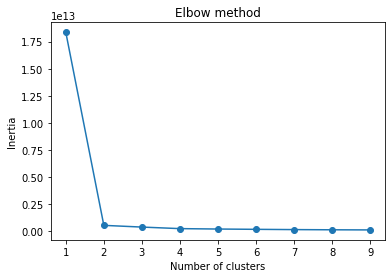

In [27]:
plot_inertia(kmeans, kmdf, range(1, 10))

In [28]:
kmeans.set_params(n_clusters=2)
kmeans.fit(kmdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
kmeans.labels_
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
kmdf['cluster'] = kmeans.labels_
print(kmdf['cluster'].value_counts())
new_df =  kmdf[kmdf['cluster'] == 1]
# #fourhundred['result'].value_counts()








0    275996
1      1763
Name: cluster, dtype: int64


In [33]:
for col in new_df.columns:
    print(new_df[col].value_counts())

9    728
1    624
4    197
2    187
0     18
5      4
6      3
3      2
Name: application_type, dtype: int64
 1      845
-999    512
 2      125
 3       86
 4       85
 0       72
 14      24
 10       9
 6        3
 12       2
Name: col_type, dtype: int64
-999    1118
 5       484
 0       126
 7        22
 10       13
Name: user_has_car, dtype: int64
-999    1579
 12      114
 48       32
 84       21
 1         8
 6         7
 3         2
Name: user_work_period, dtype: int64
 0      927
 1      304
-999    287
 2      124
 4       64
 3       57
Name: loan_limit_n, dtype: int64
 0      912
-999    741
 1      108
 2        2
Name: user_loan_experience_n, dtype: int64
-999    1240
 0       434
 1        66
 2        23
Name: user_age_n, dtype: int64
 1      1177
 0       478
-999      87
 3        14
 2         7
Name: quality, dtype: int64
20     820
40     298
250    187
100    182
30     140
10     115
500     15
50       6
Name: application_term_buckets, dtype: int64
100000    1

In [34]:
new_df

,application_type,col_type,user_has_car,user_work_period,loan_limit_n,user_loan_experience_n,user_age_n,quality,application_term_buckets,app_limit_buckets,date_buckets,term_buckets,limit_buckets,result,cluster
821,1,-999,-999,-999,-999,-999,-999,1,20,100000,7,12,51,0,1
822,1,-999,-999,-999,-999,-999,-999,1,20,100000,7,12,500,1,1
825,2,-999,-999,-999,-999,-999,-999,1,20,100000,7,12,51,0,1
826,2,-999,-999,-999,-999,-999,-999,1,20,100000,7,12,500,1,1
827,1,-999,-999,-999,-999,-999,-999,1,20,100000,7,12,51,0,1
828,1,-999,-999,-999,-999,-999,-999,1,20,100000,7,12,500,1,1
913,1,-999,-999,-999,-999,-999,-999,1,20,100000,7,12,500,0,1
916,1,-999,-999,-999,-999,-999,-999,1,20,100000,7,12,500,0,1
917,1,-999,-999,-999,-999,-999,-999,1,20,100000,7,12,500,0,1
1497,2,-999,-999,-999,-999,-999,-999,1,30,100000,7,24,500,0,1


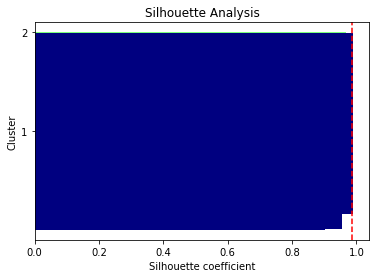

In [7]:
plot_silhouette(kmeans, qu_df)

In [ ]:
dummy_df = 